<a href="https://colab.research.google.com/github/moonsung1234/LearningExample/blob/main/MultipleRegression_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
perch_full = pd.read_csv("https://bit.ly/perch_csv")
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [5]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
perch_weight = np.array(perch_weight).reshape(-1, 1)

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, test_size=0.2, random_state=2021)

In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape, test_poly.shape, poly.get_feature_names())

(44, 9) (12, 9) ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']


StandardScaler 클래스를 이용해 표준편차를 구하는 작업

In [9]:
ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(train_scaled)

[[-0.51962126 -0.64044182 -0.58136023 -0.60286253 -0.65634038 -0.6310313
  -0.69905907 -0.67304258 -0.64649369]
 [-1.21012469 -1.08341606 -1.1271372  -1.06353985 -1.02050729 -1.02626089
  -0.97925898 -0.98249644 -0.97880881]
 [-0.35521569 -0.45906654 -0.47110226 -0.47107039 -0.52161154 -0.52694319
  -0.56467965 -0.56612587 -0.56657694]
 [-0.65114572 -0.45906654 -0.63097632 -0.70217429 -0.6307248  -0.69473567
  -0.56467965 -0.62875799 -0.68105447]
 [-1.07860023 -1.08341606 -0.95623734 -0.98735549 -0.98561841 -0.93926642
  -0.97925898 -0.93432908 -0.88607208]
 [-0.41001755 -0.4939464  -0.52623124 -0.51594585 -0.55670312 -0.5702878
  -0.59140859 -0.60031592 -0.60707239]
 [ 0.02839733 -0.18351564 -0.18443152 -0.13048925 -0.24255754 -0.24540671
  -0.33867656 -0.3377566  -0.33868531]
 [-0.79363056 -0.91250474 -1.04995662 -0.80362118 -0.8479505  -0.89608461
  -0.8792197  -0.91479674 -0.93820594]
 [ 1.83685867  1.672093    1.61277347  2.09864025  1.98952615  1.94268213
   1.86954746  1.8221816

In [10]:
model = LinearRegression()
model.fit(train_scaled, train_target)

print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.992454630824144
0.9650525972831363


**릿지(Ridge)** 규제 모델.
> 릿지 규제 모델은 계수를 제곱한 값을 기준으로 규제를 적용한다.



In [14]:
ridge = Ridge()
ridge.fit(train_scaled, train_input)

print(ridge.score(train_scaled, train_input))
print(ridge.score(test_scaled, test_input)) # 과대적합이 나아진것을 볼 수 있음

0.9973665469676006
0.9952703367613956


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

릿시 규제 모델의 적합한 alpha 값을 찾는 법

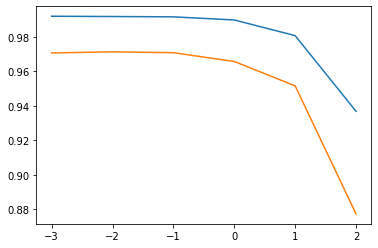

In [19]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for a in alpha_list :
  ridge = Ridge(alpha=a, max_iter=1000)
  ridge.fit(train_scaled, train_target)

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

**라소(Lasso)** 규제 모델.
> 라소 규제 모델은 계수의 절댓값을 기준으로 규제를 적용한다.



In [15]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9898480104577734
0.9660201596800073


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 501.18490420161834, tolerance: 501.10067972727273
  positive)


라소 규제 모델의 적절한 alpha 값을 찾는법

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17702.91999054551, tolerance: 501.10067972727273
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3693.7051752082916, tolerance: 501.10067972727273
  positive)


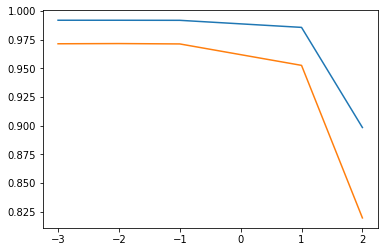

In [29]:
alpha_list = [0.001, 0.01, 0.1, 10, 100]
train_score = []
test_score = []

for a in alpha_list :
  lasso = Lasso(alpha=a, max_iter=10000)
  lasso.fit(train_scaled, train_target)

  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)